<a href="https://colab.research.google.com/github/osmarbraz/exemplos_python/blob/master/ExemplosPythonEstatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplos Estatísticas Python no Google Colaboratory

Estatística é a parte da ciência responsável pela coleta, organização e interpretação de dados experimentais e pela extrapolação dos resultados da amostra para a população. 

Exemplos em python:
- Medidas de tendência central;
- Mínimos quadrados;
- Estatísticas de conjuntos;
- Softmax;
- Métricas;
- Binary Cross-Entropy;
- Validação cruzada(Cross Validation).

-----------------------------------------
**Guia Colab Iniciante:**

https://medium.com/machina-sapiens/google-colab-guia-do-iniciante-334d70aad531

**Documentação oficial:**

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb

**Características :**

https://colab.research.google.com/notebooks/basic_features_overview.ipynb



Precisão e acurácia

https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c

##Medidas de tendência central

Com as bibliotecas Numpy e Stats.

https://medium.com/@naiaracerqueira/estat%C3%ADstica-descritiva-1-ed523dffb99f

https://www.w3schools.com/python/python_ml_mean_median_mode.asp

###Valores

In [1]:
# Declara uma lista com os valores dos números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Mostra a quantidade de elementos
print(len(lista))

20


###Média aritmética.

Indica o valor onde estão concentrados os dados de um conjunto de valores.

Representado por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra.

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

In [2]:
# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Somatório
soma = 0
# Percorre a lista
for x in lista:
  soma = soma + x

# Calcula a média
media = soma/len(lista)
print("Média aritmética: ", media)

Média aritmética:  5.2


usando numpy

In [3]:
# Import das bibliotecas
import numpy as np

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Usa o método mean do numpy
media = np.mean(lista)

print("Média aritmética: ", media)

Média aritmética:  5.2


###Mediana

Valor que separa a metade superior da metade inferior de uma distribuição de dados, ou o valor no centro da distribuição. 

Para obtermos a mediana:

1. Ordenar o conjunto de dados;
2. Identificar o número de observações do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:

$$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:

$$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:

$$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

In [4]:
# Import das bibliotecas
import numpy as np

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Usa o método median do numpy
mediana = np.median(lista)

print("Mediana: ", mediana)

Mediana:  5.5


###Moda

O valor que mais se repete no conjunto de dados.

In [5]:
# Import das bibliotecas
import numpy as np
from scipy import stats

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Usa o método mode do stats
moda = stats.mode(lista)

print("Moda: ", moda[0])

Moda:  [2]


###Amplitude/Dispersão

Diferença entre o maior e o menor valor de um conjunto de dados. 

Para fazer este cálculo no Pandas, usaremos as funções max() e min(), que obviamente, retornam o valor máximo e mínimo de um conjunto de dados, e depois subtrairemos um do outro:

In [6]:
# Import das bibliotecas
import numpy as np

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Usa o método max do stats
maior = np.max(lista)
# Usa o método min do stats
menor = np.min(lista)

# Calcula a amplitude
amplitude = maior - menor

print("Amplitude: ", amplitude)
print("Maior: ", maior)
print("Menor: ", menor)

Amplitude:  8
Maior:  9
Menor:  1


### Regra de Sturges

É um critério usado para determinar o número de classes ou intervalos necessários para representar graficamente um conjunto de dados estatísticos. Esta regra foi enunciada em 1926 pelo matemático alemão Herbert Sturges.

$k = 1 + \frac {10}{3}\log_{10}n$

In [7]:
# Import das bibliotecas
import math

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Recupera a quantidade de elmeentos da lista
n = len(lista)

# Calcula k
k = 1 + (10/3 * math.log10(n))

print("k=",k)

k= 5.336766652213271


###Medidas de dispersão

####Variância

Expressa quanto os dados de um conjunto estão afastados da sua média.

Uma amostra é sempre um grupo menor ou um subconjunto dentro de uma população.

* Variância populacional

$$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

* Variância amostral

$$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [8]:
# Import das bibliotecas
import numpy as np

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Usa o método var do numpy
media = np.mean(lista)

# Usa o método var do numpy
variancia = np.var(lista)

print("Variância: ", variancia)
print("Media: ", media)

Variância:  7.06
Media:  5.2


Quanto menor a variância mais próximo os valores estão em relação a média.

####Desvio padrão

Indica quanto os dados estão afastados da média. Um valor de desvio padrão alto indica que os valores estão mais espalhados, mais longe da média, e um desvio padrão baixo indica que os valores estão mais próximos da média. 

Raiz quadrada da variância.

* Desvio padrão populacional

$$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

* Desvio padrão amostral

$$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [9]:
# Import das bibliotecas
import numpy as np

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Usa o método std do numpy
desviopadrao = np.std(lista)

print("Desvio padrão: ", desviopadrao)

Desvio padrão:  2.6570660511172846


####Coeficiente de variação

Utilizado para comparação entre amostras; é uma medida adimensional.

In [10]:
# Import das bibliotecas
import numpy as np

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

media = np.mean(lista)
variancia = np.var(lista)

coeficiente = variancia/media

print("Coeficiente: ", coeficiente)

Coeficiente:  1.3576923076923075


###Medidas separatrizes

####Percentil

Divide o conjunto de dados em 100 partes iguais, ou seja, em pedaços de tamanhos iguais que contêm 1% dos dado.

In [11]:
# Import das bibliotecas
import numpy as np

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Usa o método percentil do numpy
P0 = np.percentile(lista, 0)
P20 = np.percentile(lista, 20)
P40 = np.percentile(lista, 40)
P50 = np.percentile(lista, 50)
P60 = np.percentile(lista, 60)
P80 = np.percentile(lista, 80)
P100 = np.percentile(lista, 100)

print("P0: ", P0)
print("P20: ", P20)
print("P40: ", P40)
print("P50: ", P50)
print("P60: ", P60)
print("P100: ", P100)

P0:  1.0
P20:  2.0
P40:  4.6000000000000005
P50:  5.5
P60:  6.0
P100:  9.0


####Quartil

Divide o conjunto de dados em 4 partes iguais que contém 25% dos dados.

In [12]:
# Import das bibliotecas
import numpy as np

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Usa o método quantile do numpy
Q1 = np.quantile(lista, 0.25)
Q2 = np.quantile(lista, 0.50)
Q3 = np.quantile(lista, 0.75)
Q4 = np.quantile(lista, 1)

print("Q1: ", Q1)
print("Q2: ", Q2)
print("Q3: ", Q3)
print("Q4: ", Q4)

Q1:  2.75
Q2:  5.5
Q3:  7.25
Q4:  9


###Histograma

É a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

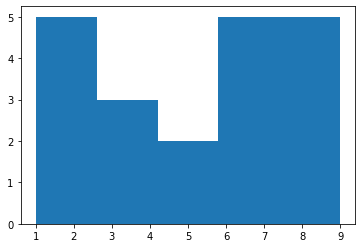

In [13]:
# Import da biblioteca
import numpy as np
import matplotlib.pyplot as plt

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Cria um histograma com 5 classes
plt.hist(lista, bins=5)

# Mostra o gráfico
plt.show()

###Assimetria

Valores:
* próxima de zero = normalmente distribuídos
* valor > 0 = assimetria positiva, distribuição mais a direita. 
  * valores de moda < mediana < média
* valor < 0 = assimetria negativa, distribuição mais a esquerda.
  * valores de média < mediana < moda

In [14]:
# Import das bibliotecas
import numpy as np
from scipy import stats

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Usa o método stats do scipy
assimetria = stats.skew(lista)

print("Assimetria: ", assimetria)

Assimetria:  -0.10363088547721301


###Curtose

Grau de achatamento da curva, em relação a curva normal.

In [15]:
# Import das bibliotecas
import numpy as np
from scipy import stats

# Declara uma lista com os números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]

# Usa o método kurtosis do stats
curtose = stats.kurtosis(lista)

print("Curtose: ", curtose)

Curtose:  -1.2593713134685296


###Covariância

A variância é utilizada quando queremos calcular a dispersão dos dados em relação a uma única variável, quando queremos calcular a dispersão com base em duas variáveis diferentes utilizamos a covariância.

In [16]:
dados = np.matrix([[1,2,7,4,1,9,5,3,9,2],
                   [6,8,9,4,2,5,6,7,6,8]])

# Usa o método cov do numpy
covariancia = np.cov(dados)    

print("Covariancia: ", covariancia)

Covariancia:  [[9.56666667 0.74444444]
 [0.74444444 4.32222222]]


A coraviância indica que quando a variável da primeira linha aumenta, a variável da segunda linha também aumenta.

###Correlação

Indica como uma variável está relacionada com outra variável. 

In [17]:
dados = np.matrix([[1,2,7,4,1,9,5,3,9,2],
                   [6,8,9,4,2,5,6,7,6,8]])

# Usa o método corrcoef do numpy
correlacao = np.corrcoef(dados)    

print("Correlação: ", correlacao)

Correlação:  [[1.         0.11577064]
 [0.11577064 1.        ]]


Quanto mais próximo o valor for de 1, mais forte é a correlação entre as variáveis, se o valor for 0 então não há correlação e quanto mais próximo o valor for de -1, maior é a anticorrelação entre as variáveis.

###Estatística com pandas describe


#### Simples 

In [18]:
# Import das bibliotecas
import pandas as pd

# Declara uma lista com os valores dos números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]
grupo = ['A','A','A','B','A','A','B','A','B','A','A','B','A','B','A','A','B','A','B','A']

# Formata os dados
dados = {'numero': lista, 'grupo': grupo}

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Exibe todas as linhas
pd.set_option('display.max_rows', None)

# Exibe todas as linhas
pd.set_option('display.max_columns', None)

# Cria um DataFrame das estatísticas a partir dos dados formatados
df_stats = pd.DataFrame(data=dados)

#Exibe as estatísticas
df_stats.describe(include='all') 

,numero,grupo
count,20.00,20
unique,NaN,2
top,NaN,A
freq,NaN,13
mean,5.20,NaN
std,2.73,NaN
min,1.00,NaN
25%,2.75,NaN
50%,5.50,NaN
75%,7.25,NaN


#### Especificando o tipo de dados das colunas


In [19]:
# Import das bibliotecas
import pandas as pd

# Declara uma lista com os valores dos números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]
grupo = ['A','A','A','B','A','A','B','A','B','A','A','B','A','B','A','A','B','A','B','A']

# Formata os dados
dados = {'numero': lista, 'grupo': grupo}

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Exibe todas as linhas
pd.set_option('display.max_rows', None)

# Exibe todas as linhas
pd.set_option('display.max_columns', None)

# Cria um DataFrame das estatísticas a partir dos dados formatados
df_stats = pd.DataFrame(data=dados)

#Exibe as estatísticas
df_stats.describe(include=['float', 'int']) 

,numero
count,20.00
mean,5.20
std,2.73
min,1.00
25%,2.75
50%,5.50
75%,7.25
max,9.00


#### Gerando dados transpostos

In [20]:
# Import das bibliotecas
import pandas as pd

# Declara uma lista com os valores dos números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]
grupo = ['A','A','A','B','A','A','B','A','B','A','A','B','A','B','A','A','B','A','B','A']

# Formata os dados
dados = {'numero': lista, 'grupo': grupo}

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Exibe todas as linhas
pd.set_option('display.max_rows', None)

# Exibe todas as linhas
pd.set_option('display.max_columns', None)

# Cria um DataFrame das estatísticas a partir dos dados formatados
df_stats = pd.DataFrame(data=dados)

#Exibe as estatísticas
df_stats.describe(include=['float', 'int']).transpose()

,count,mean,std,min,25%,50%,75%,max
numero,20.0,5.2,2.73,1.0,2.75,5.5,7.25,9.0


#### Dados agrupados


In [21]:
# Import das bibliotecas
import pandas as pd

# Declara uma lista com os valores dos números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]
grupo = ['A','A','A','B','A','A','B','A','B','A','A','B','A','B','A','A','B','A','B','A']

# Formata os dados
dados = {'numero': lista, 'grupo': grupo}

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Exibe todas as linhas
pd.set_option('display.max_rows', None)

# Exibe todas as linhas
pd.set_option('display.max_columns', None)

# Cria um DataFrame das estatísticas a partir dos dados formatados
df_stats = pd.DataFrame(data=dados)

# Agrupa pelo grupo
df_grupo = df_stats[['numero','grupo']].groupby('grupo')

#Exibe as estatísticas
df_grupo.describe(include='all') 

numero                                     
       count  mean   std  min  25%  50%  75%  max
grupo                                            
A       13.0  4.77  3.06  1.0  2.0  5.0  7.0  9.0
B        7.0  6.00  1.91  4.0  4.5  6.0  7.0  9.0

#### Dados agrupados transpostos


In [22]:
# Import das bibliotecas
import pandas as pd

# Declara uma lista com os valores dos números a serem analisados
lista = [1,2,7,4,1,9,5,3,9,2,6,8,9,4,2,5,6,7,6,8]
grupo = ['A','A','A','B','A','A','B','A','B','A','A','B','A','B','A','A','B','A','B','A']

# Formata os dados
dados = {'numero': lista, 'grupo': grupo}

# Mostra somente com duas casas decimais os números reais
pd.set_option('precision', 2)

# Exibe todas as linhas
pd.set_option('display.max_rows', None)

# Exibe todas as linhas
pd.set_option('display.max_columns', None)

# Cria um DataFrame das estatísticas a partir dos dados formatados
df_stats = pd.DataFrame(data=dados)

# Agrupa pelo grupo
df_grupo = df_stats[['numero','grupo']].groupby('grupo')

#Exibe as estatísticas
df_grupo.describe(include='all').transpose()

grupo             A     B
numero count  13.00  7.00
       mean    4.77  6.00
       std     3.06  1.91
       min     1.00  4.00
       25%     2.00  4.50
       50%     5.00  6.00
       75%     7.00  7.00
       max     9.00  9.00

## Mínimos quadrados
 
https://medium.com/@bruno.dorneles/regress%C3%A3o-linear-conceitos-e-implementa%C3%A7%C3%A3o-com-python-232c19e00f03

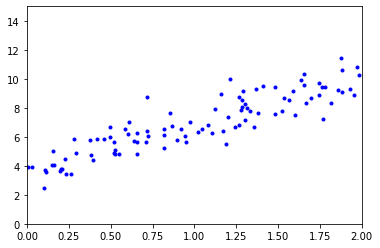

In [23]:
# Import da biblioteca
import numpy as np
import matplotlib.pyplot as plt

# Gera os dados do eixo X
X = 2 * np.random.rand(100, 1)
# Gera os dados do eixo y
y = 4 + 3 * X + np.random.randn(100, 1)

# Insere os dados no gráfico
plt.plot(X, y, "b.")

# Insere os rótulos do eixo x
plt.axis([0, 2, 0, 15])

# Mostra o gráfico
plt.show()

In [24]:
X_b = np.c_[np.ones((100, 1)), X]
theta_param = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

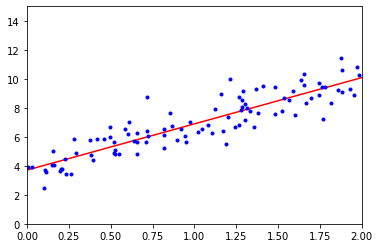

In [25]:
# Import da biblioteca
import numpy as np
import matplotlib.pyplot as plt

# Gera os dados do eixo X
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Gera os dados do eixo y
y_predict = X_new_b.dot(theta_param)

# Insere os dados no gráfico
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

# Insere os rótulos do eixo x
plt.axis([0, 2, 0, 15])

# Mostra o gráfico
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_reg.intercept_ #coeficiente linear
linear_reg.coef_ #coeficiente angular
linear_reg.predict(X_new)

array([[ 3.70186217],
       [10.08380408]])

## Estatísticas de conjunto

### Exemplo 1 - Números e classes

Precisão e Acurácia

In [27]:
from sklearn.metrics import classification_report

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

nome_alvos = ['class 0', 'class 1'] #mesma quantidade de classes do alvo

print(classification_report(X_alvo, y_predicao, target_names=nome_alvos))

              precision    recall  f1-score   support

     class 0       0.80      1.00      0.89         4
     class 1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



Matrix de confusão texto

In [28]:
from sklearn.metrics import confusion_matrix

print (confusion_matrix(X_alvo, y_predicao))

[[4 0]
 [1 5]]


Matrix de confusão gráfico

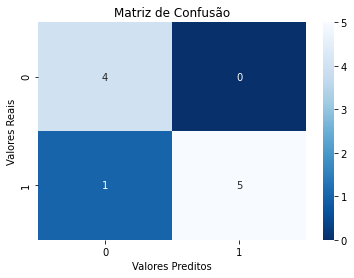

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

ax = sns.heatmap(confusion_matrix(X_alvo, y_predicao), cmap='Blues_r', annot=True, fmt='d')
_ = ax.set(xlabel='Valores Preditos', ylabel='Valores Reais', title='Matriz de Confusão')

### Exemplo 2 - Vetorização de frases

In [30]:
from keras.preprocessing.text import Tokenizer

frases = ['O gato no tapete.', 'O cachorro comeu minha tarefa.']

# Procura a frase com o maior número de palavras
maior_frase = len(max(frases, key=lambda k: len(k.split())).split())
print("Tamanho maior frase:", maior_frase)

# Cria o tokenizador
tokenizador = Tokenizer(num_words=maior_frase)

# Ajusta o tamanho
tokenizador.fit_on_texts(frases)

# Cria a matriz do texto
matriz_texto = tokenizador.texts_to_matrix(frases, mode='binary')

# Índices das palavras
indice_palavra = tokenizador.word_index

# Mostra os dados
print("Exemplo:",frases)
print("Índices:", indice_palavra)
print('Palavras unicas %s .' % len(indice_palavra))

# Mostra a matriz das frases
print("Matriz das frases:")
for x in matriz_texto:
   print(x)

Tamanho maior frase: 5
Exemplo: ['O gato no tapete.', 'O cachorro comeu minha tarefa.']
Índices: {'o': 1, 'gato': 2, 'no': 3, 'tapete': 4, 'cachorro': 5, 'comeu': 6, 'minha': 7, 'tarefa': 8}
Palavras unicas 8 .
Matriz das frases:
[0. 1. 1. 1. 1.]
[0. 1. 0. 0. 0.]


### Exemplo 3 - String e classes

Precisão e acurácia

In [31]:
from sklearn.metrics import classification_report

y_alvo1   = ["Quem dia bonito.", "Vamos a feira", "Bom dia"]
y_alvo   = ["S1", "S2", "S3"]

y_predicao1 = ["Quem dia bonito.", "Vamos a feira Bom dia"]
VP = ['SIM','NAO']

y_predicao = ["S1", "", "S3"]

nome_alvos = ['class 0', 'class 1', 'class 2', 'class 3']

print(classification_report(y_alvo, y_predicao, target_names=nome_alvos))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         0
     class 1       1.00      1.00      1.00         1
     class 2       0.00      0.00      0.00         1
     class 3       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.50      0.50         3
weighted avg       0.67      0.67      0.67         3



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Softmax

### Exemplo manual

In [32]:
entrada =  [1.2, 0.9, 0.75]

print("Entrada = ", entrada)

soma = sum(entrada)

print("Soma = " , soma)

saida = []
for x in entrada:
   saida.append(x/soma)

print("Saída = ", saida)   

Entrada =  [1.2, 0.9, 0.75]
Soma =  2.85
Saída =  [0.42105263157894735, 0.3157894736842105, 0.2631578947368421]


### Exemplo NumPy

In [33]:
import numpy as np

def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)

entrada = [1.2, 0.9, 0.75]

print("Entrada = ", entrada)

saida = softmax(entrada)

print("Saída = ", saida)   

Entrada =  [1.2, 0.9, 0.75]
Saída =  [0.42044253 0.31147148 0.26808599]


### Exemplo sklearn

In [34]:
from sklearn.utils.extmath import softmax
import numpy as np

entrada =  [1.2, 0.9, 0.75]

print("Entrada = ", entrada)

saida = softmax(np.array([entrada]))

print("Saída = ", saida)   

Entrada =  [1.2, 0.9, 0.75]
Saída =  [[0.42044253 0.31147148 0.26808599]]


## Métricas

https://www.youtube.com/watch?v=860F540KmkU

https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509

### Acurácia

In [35]:
from sklearn.metrics import accuracy_score

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

acuracia = accuracy_score(y_predicao,X_alvo)

print("X:", X_alvo)
print("y:", y_predicao)

print("Acurácia:", acuracia)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
Acurácia: 0.9


### Precisão

In [36]:
from sklearn.metrics import precision_score

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 1 , 1, 0, 1, 0, 1, 0 , 1, 1]

precisao = precision_score(y_predicao,X_alvo)

print("X:", X_alvo)
print("y:", y_predicao)

print("Precisão:", precisao)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
Precisão: 0.8333333333333334


### Recall

In [37]:
from sklearn.metrics import recall_score

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 1, 1 , 1, 0, 1, 0, 1, 0 , 1, 1]

recall = recall_score(y_predicao,X_alvo)

print("X:", X_alvo)
print("y:", y_predicao)

print("Recall:", recall)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
Recall: 0.8571428571428571


### F1 Score

In [38]:
from sklearn.metrics import f1_score

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 1, 1 , 1, 0, 1, 0, 1, 0 , 1, 1]

f1 = f1_score(X_alvo,y_predicao)

print("X:", X_alvo)
print("y:", y_predicao)

print("F1:", f1)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
F1: 0.923076923076923


### Log loss

https://www.youtube.com/watch?v=GdNmDQRdL2o

In [39]:
import random
from sklearn.metrics import log_loss

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

X_alvo_random = [random.random() for i in range(10)]
y_predicao = [ 1, 1 , 1, 0, 1, 0, 1, 0 , 1, 1]

loss = log_loss(y_predicao, X_alvo_random)

print("X:", X_alvo)
print("y:", y_predicao)

print("Log Loss:", loss)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
Log Loss: 1.2086758539092015


### Raiz Quadrada do Erro Quadrático Médio 1
Root Mean Squared Error (RMSE)

O erro quadrático médio é definido
como sendo a média da diferença entre o valor do
estimador e do parâmetro ao quadrado.

https://medium.com/@bruno.dorneles/regress%C3%A3o-linear-conceitos-e-implementa%C3%A7%C3%A3o-com-python-232c19e00f03

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

rmse = sqrt(mean_squared_error(X_alvo, y_predicao))

print("X:", X_alvo)
print("y:", y_predicao)

print("Erro quadrático médio:", rmse)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
Erro quadrático médio: 0.31622776601683794


### Raiz Quadrada do Erro Quadrático Médio 2
Root Mean Squared Error (RMSE)

https://qastack.com.br/programming/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python

In [41]:
import numpy as np

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

rmse = np.sqrt(((np.array(X_alvo) - np.array(y_predicao)) ** 2).mean())

print("X:", X_alvo)
print("y:", y_predicao)

print("Erro quadrático médio:", rmse)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
Erro quadrático médio: 0.31622776601683794


 ### Coeficiente de correlação de Matthews (MCC)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

* 1.0 = Predição perfeita
* 0.0 = Média
* -1.0 = Predição inversa

In [42]:
from sklearn.metrics import matthews_corrcoef

X_alvo     = [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

MCC = matthews_corrcoef(X_alvo, y_predicao)

print("X:", X_alvo)
print("y:", y_predicao)

print(MCC)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
0.816496580927726


### Cálculo de métricas

In [43]:
X_alvo     =  np.array([ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1])
y_predicao =  np.array([ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1])

# Acumula os resultados dos testes         
vp = [] # Verdadeiro positivo
vn = [] # Verdadeiro negativo
fp = [] # Falso positivo
fn = [] # Falso negativo

# Verifica a predição realizada e o rótulo previsto
vp.append(((y_predicao==1) & (X_alvo==1)).sum())
vn.append(((y_predicao==0) & (X_alvo==0)).sum())
fp.append(((y_predicao==1) & (X_alvo==0)).sum())
fn.append(((y_predicao==0) & (X_alvo==1)).sum())

vp_s, vn_s, fp_s, fn_s = sum(vp), sum(vn), sum(fp), sum(fn)
acc = (vp_s+vn_s)/(vp_s+vn_s+fp_s+fn_s)
if (vp_s+fn_s) != 0:
  rec = (vp_s)/(vp_s+fn_s)
else:
  rec = 0        
if (vp_s+fp_s) != 0:
  pre = (vp_s)/(vp_s+fp_s)
else:
  pre = 0        
if (pre + rec) != 0:
  f1 = 2 * ((pre * rec)/(pre + rec))
else:
  f1 = 0            
        
print('Acurácia: {:.8f}; Recall: {:.8f}; Precisão: {:.8f}, F1:{:.8f}, vp: {}; vn: {}; fp: {}; fn: {}'.format(acc, rec, pre, f1, vp_s, vn_s, fp_s, fn_s))


Acurácia: 0.90000000; Recall: 0.83333333; Precisão: 1.00000000, F1:0.90909091, vp: 5; vn: 4; fp: 0; fn: 1


###Função de cálculo de métricas

In [44]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculaMetricas(predicoes, alvos):
    precisao, recall, f1, _ = precision_recall_fscore_support(alvos, predicoes, average='binary')
    acuracia = accuracy_score(alvos, predicoes)
    return {
        'Acurácia': acuracia,
        'Recall': recall,
        'Precisão': precisao,
        'f1': f1
    }

In [45]:
X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

metricas = calculaMetricas(y_predicao,X_alvo)

print("Metricas:", metricas)

Metricas: {'Acurácia': 0.9, 'Recall': 0.8333333333333334, 'Precisão': 1.0, 'f1': 0.9090909090909091}


###Calculando métricas

In [46]:
from sklearn.metrics import classification_report

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

print(classification_report(X_alvo, y_predicao))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



### Matriz de confusão

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



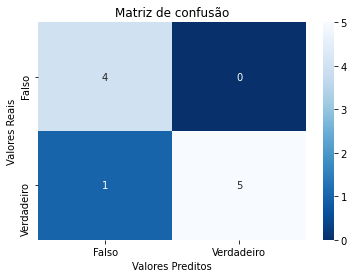

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

print(classification_report(X_alvo, y_predicao))

# Insere os dados no gráfico
ax = sns.heatmap(confusion_matrix(X_alvo, y_predicao), cmap='Blues_r', annot=True, fmt='d')

# Título do gráfico
ax.set_title('Matriz de confusão')
# Texto do eixo x
ax.set_xlabel('Valores Preditos')
# Texto do eixo y
ax.set_ylabel('Valores Reais')
# Rótulos adicionais
ax.xaxis.set_ticklabels(['Falso', 'Verdadeiro'])
ax.yaxis.set_ticklabels(['Falso', 'Verdadeiro'])

# Mostra o gráfico
plt.show()

## Binary cross-entropy” ou “log loss”

https://medium.com/ensina-ai/uma-explica%C3%A7%C3%A3o-visual-para-fun%C3%A7%C3%A3o-de-custo-binary-cross-entropy-ou-log-loss-eaee662c396c

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

#entrada
X_alvo = np.array([-2.2, -1.4, -.8, .2, .4, .8, 1.2, 2.2, 2.9, 4.6])

#rótulos
y = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

logr = LogisticRegression(solver='lbfgs')
logr.fit(X_alvo.reshape(-1, 1), y)

y_predicao = logr.predict_proba(X_alvo.reshape(-1, 1))[:, 1].ravel()
loss = log_loss(y, y_predicao)

print("X:", X_alvo)
print("y:", y)

print('p(y) = {}'.format(np.round(y_predicao, 2)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

X: [-2.2 -1.4 -0.8  0.2  0.4  0.8  1.2  2.2  2.9  4.6]
y: [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
p(y) = [0.19 0.33 0.47 0.7  0.74 0.81 0.86 0.94 0.97 0.99]
Log Loss / Cross Entropy = 0.3329


## Validação Cruzada k-folds sem classe

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [49]:
# Import das bibliotecas
import numpy as np
from sklearn.model_selection import KFold

#Conjunto de dados
X =  np.array(["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"])

# Divisão em k folds(n_splits)
# shuffle, embaralha cada amostra
# Quando shuffle igual True, random_state afeta a ordem dos índices,
# que controla a aleatoriedade de cada dobra.
kf = KFold(n_splits=5,  random_state=True, shuffle=True)
print(kf)

# Percorre os indices do conjunto de dados
for train_index, test_index in kf.split(X):
  print("Índices:", train_index, test_index)
  
  # Recupera os dados do fold
  X_train, X_test = X[train_index], X[test_index]
  print("Dados  :", X_train, X_test)

KFold(n_splits=5, random_state=True, shuffle=True)
Índices: [0 1 3 4 5 6 7 8] [2 9]
Dados  : ['a' 'b' 'd' 'e' 'f' 'g' 'h' 'i'] ['c' 'j']
Índices: [0 1 2 3 5 7 8 9] [4 6]
Dados  : ['a' 'b' 'c' 'd' 'f' 'h' 'i' 'j'] ['e' 'g']
Índices: [1 2 4 5 6 7 8 9] [0 3]
Dados  : ['b' 'c' 'e' 'f' 'g' 'h' 'i' 'j'] ['a' 'd']
Índices: [0 2 3 4 5 6 8 9] [1 7]
Dados  : ['a' 'c' 'd' 'e' 'f' 'g' 'i' 'j'] ['b' 'h']
Índices: [0 1 2 3 4 6 7 9] [5 8]
Dados  : ['a' 'b' 'c' 'd' 'e' 'g' 'h' 'j'] ['f' 'i']


## Validação Cruzada k-folds com classe

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [50]:
# Import das bibliotecas
import numpy as np
from sklearn.model_selection import StratifiedKFold

#Conjunto de dados
X =  np.array(["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"])
y =  np.array(["0", "0", "1", "0", "0", "0", "1", "1", "1", "1"])

# Divisão em k folds em quantidades semelhantes de y
# shuffle, embaralha cada amostra
# Quando shuffle igual True, random_state afeta a ordem dos índices,
# que controla a aleatoriedade de cada dobra.
skf = StratifiedKFold(n_splits=5,  random_state=True, shuffle=True)
print(skf)

# Percorre os indices do conjunto de dados
for train_index, test_index in skf.split(X, y):
  print("Índices:", train_index, test_index)
  
  # Recupera os dados do fold
  X_train, X_test = X[train_index], X[test_index]
  print("Dados  :", X_train, X_test) 
  y_train, y_test = y[train_index], y[test_index]
  print("Alvos  :", y_train, y_test) 

StratifiedKFold(n_splits=5, random_state=True, shuffle=True)
Índices: [0 1 3 5 6 7 8 9] [2 4]
Dados  : ['a' 'b' 'd' 'f' 'g' 'h' 'i' 'j'] ['c' 'e']
Alvos  : ['0' '0' '0' '0' '1' '1' '1' '1'] ['1' '0']
Índices: [0 2 3 4 5 6 7 8] [1 9]
Dados  : ['a' 'c' 'd' 'e' 'f' 'g' 'h' 'i'] ['b' 'j']
Alvos  : ['0' '1' '0' '0' '0' '1' '1' '1'] ['0' '1']
Índices: [1 2 3 4 5 7 8 9] [0 6]
Dados  : ['b' 'c' 'd' 'e' 'f' 'h' 'i' 'j'] ['a' 'g']
Alvos  : ['0' '1' '0' '0' '0' '1' '1' '1'] ['0' '1']
Índices: [0 1 2 3 4 6 7 9] [5 8]
Dados  : ['a' 'b' 'c' 'd' 'e' 'g' 'h' 'j'] ['f' 'i']
Alvos  : ['0' '0' '1' '0' '0' '1' '1' '1'] ['0' '1']
Índices: [0 1 2 4 5 6 8 9] [3 7]
Dados  : ['a' 'b' 'c' 'e' 'f' 'g' 'i' 'j'] ['d' 'h']
Alvos  : ['0' '0' '1' '0' '0' '1' '1' '1'] ['0' '1']


## Curva ROC

https://www.iditect.com/how-to/53353923.html

https://www.kaggle.com/nicholasgah/obtain-optimal-probability-threshold-using-roc

https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python